In [1]:
from sklearn.datasets import load_iris
import numpy as np
import math
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [2]:
iris_data = load_iris()
X, y = iris_data.data, iris_data.target

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
y.size

150

In [5]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
list_sepal_length=list()
list_sepal_width=list()
list_petal_length=list()
list_petal_width=list()
for row in X:
    list_sepal_length.append(row[0])
    list_sepal_width.append(row[1])
    list_petal_length.append(row[2])
    list_petal_width.append(row[3])

In [7]:
sepal_length_mean=np.mean(list_sepal_length)
sepal_length_ecart=np.std(list_sepal_length)
sepal_width_mean=np.mean(list_sepal_width)
sepal_width_ecart=np.std(list_sepal_width)
petal_length_ecart=np.std(list_petal_length)
petal_length_mean=np.mean(list_petal_width)
petal_width_ecart=np.std(list_petal_width)

In [8]:
sepal_length_mean,sepal_length_ecart

(5.843333333333334, 0.8253012917851409)

In [9]:
sepal_width_mean

3.0573333333333337

In [10]:
classe1=np.count_nonzero(y==0)
classe2=np.count_nonzero(y==1)
classe3=np.count_nonzero(y==2)

In [11]:
classe1,classe2,classe3

(50, 50, 50)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.05,random_state=0)

In [13]:
values_depth = [1, 3, 5, 10, 20, 30, 40, 50] 
values_leaf=[20,30,50,100]
parameters={'max_depth':values_depth,'min_samples_leaf':values_leaf}
model = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model,param_grid=parameters,verbose=True,cv=4)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [20, 30, 50, 100]},
             verbose=True)

In [14]:
grid_search.best_params_

{'max_depth': 1, 'min_samples_leaf': 20}

In [15]:
grid_search.best_score_

0.625

In [25]:
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02
# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]
# On ne garde seulement les deux attributs
X = iris_data.data[:, pair]
y = iris_data.target
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)
# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

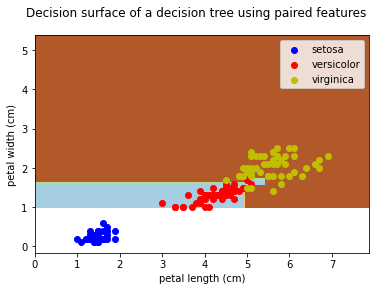

In [29]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,
y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris_data.feature_names[pair[0]])
plt.ylabel(iris_data.feature_names[pair[1]])
plt.axis("tight")
# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris_data.target_names[i],
cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()